For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [2]:
endpoint1a = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'

response1a = requests.get(endpoint1a)

response1a

<Response [200]>

In [3]:
fire_2016 = response1a.json()

In [4]:
fire_2016_df = pd.DataFrame(fire_2016)
fire_2016_df['query_count'] = fire_2016_df['query_count'].astype(int)

# fire_2016_df.dtypes

fire_2016_df['query_count'].idxmax(axis=0)

7

In [5]:
fire_2016_df.loc[
    fire_2016_df['query_count'].idxmax(axis=0)
]

month_name     August
year             2016
query_count        47
query_text       fire
Name: 7, dtype: object

In [6]:
endpoint1b = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'

response1b = requests.get(endpoint1b)

In [7]:
res1b = response1b.json()

In [8]:
res1b

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [9]:
fire_2016_dfb = pd.DataFrame(res1b)
#search_df = search_df.reset_index()
fire_2016_dfb

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [10]:
fire_2016_dfb = fire_2016_dfb.sort_values('query_count', ascending = False)
fire_2016_dfb.head(1)

,month_name,year,query_count,query_text
7,August,2016,47,fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [11]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=43678&$where=query_count > 100'

response2 = requests.get(endpoint2)

response2

<Response [200]>

In [12]:
result2 = response2.json()
result2

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [13]:
all_over_100 = pd.DataFrame(result2)
all_over_100['query_count'] = all_over_100['query_count'].astype('int')
all_over_100.dtypes

month_name     object
year           object
query_count     int32
query_text     object
month          object
dtype: object

In [14]:
all_over_100 = all_over_100.loc[all_over_100['query_count'] > 100]
len(all_over_100)       

1262

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [15]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=43678&query_text=codes'

response3 = requests.get(endpoint3)

response3

<Response [200]>

In [16]:
result3 = response3.json()
result3

[{'month_name': 'January',
  'year': '2014',
  'query_count': '37',
  'query_text': 'codes'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '75',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '90',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '65',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '84',
  'query_text': 'codes'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '77',
  'query_text': 'codes'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '92',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '70',
  'query_text': 'codes'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '71',
  'query_text': 'codes'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '45',
  'query_text': 'codes'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '53',
  '

In [17]:
codes_over_100 = pd.DataFrame(result3)
codes_over_100['query_count'] = codes_over_100['query_count'].astype(int)
codes_over_100

,month_name,year,query_count,query_text,month
0,January,2014,37,codes,NaN
1,February,2014,75,codes,NaN
2,March,2014,90,codes,NaN
3,April,2014,65,codes,NaN
4,May,2014,84,codes,NaN
...,...,...,...,...,...
81,March,2021,134,codes,3
82,April,2021,102,codes,4
83,May,2021,115,codes,5
84,June,2021,138,codes,6


In [18]:
codes_over_100 = codes_over_100.loc[codes_over_100['query_count'] > 100]
len(codes_over_100)

56

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [19]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=43678&query_text=maps&$select=month_name,sum(query_count)&$group=month_name'

response4 = requests.get(endpoint4)

response4

<Response [200]>

In [20]:
result4 = response4.json()
result4

[{'month_name': 'April', 'sum_query_count': '1309'},
 {'month_name': 'August', 'sum_query_count': '991'},
 {'month_name': 'December', 'sum_query_count': '556'},
 {'month_name': 'February', 'sum_query_count': '832'},
 {'month_name': 'January', 'sum_query_count': '924'},
 {'month_name': 'July', 'sum_query_count': '1062'},
 {'month_name': 'June', 'sum_query_count': '1216'},
 {'month_name': 'March', 'sum_query_count': '1090'},
 {'month_name': 'May', 'sum_query_count': '1019'},
 {'month_name': 'November', 'sum_query_count': '805'},
 {'month_name': 'October', 'sum_query_count': '981'},
 {'month_name': 'September', 'sum_query_count': '951'}]

In [21]:
maps = pd.DataFrame(result4)
maps = maps.sort_values('sum_query_count', ascending = True)
maps

,month_name,sum_query_count
8,May,1019
5,July,1062
7,March,1090
6,June,1216
0,April,1309
2,December,556
9,November,805
3,February,832
4,January,924
11,September,951


In [22]:
maps.dtypes

month_name         object
sum_query_count    object
dtype: object

In [23]:
maps['month_name'] = maps['month_name'].astype('string')
maps['sum_query_count'] = maps['sum_query_count'].astype('int')

maps.dtypes

month_name         string
sum_query_count     int32
dtype: object

Text(0.5, 1.0, 'Count of "Maps" Searches Grouped by Month')

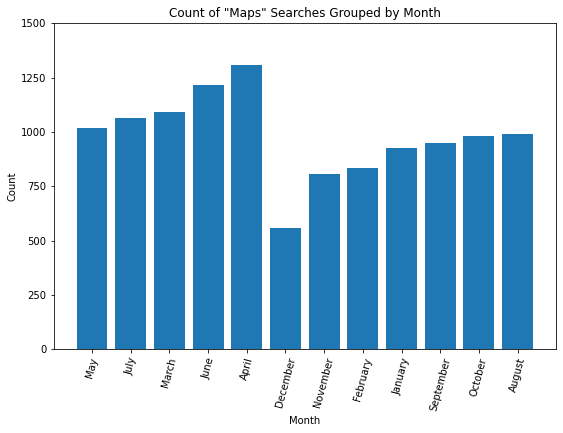

In [24]:
plt.figure(figsize=(9,6))
plt.bar('month_name', 'sum_query_count', data = maps.head(85))
plt.yticks([0,250,500,750,1000,1250,1500]);
plt.xticks(rotation = 75)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of "Maps" Searches Grouped by Month')

#### Stretch Questions
5. Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)


In [25]:
endpoint5 = 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=985000'

response5 = requests.get(endpoint5)

response5

<Response [200]>

In [26]:
result5 = response5.json()
len(result5)

984962

In [27]:
result5

[{'case_number': '958233',
  'status': 'New',
  'case_request': 'Streets, Roads & Sidewalks',
  'case_subrequest': 'Street Lighting',
  'additional_subrequest': 'Report Outage',
  'date_time_opened': '2022-04-24T20:44:35.000',
  'case_origin': 'hubNashville Community',
  'state_issue': 'False',
  'closed_when_created': 'False',
  'incident_address': '4105 Pineorchard Pl',
  'incident_city': 'ANTIOCH',
  'incident_council_district': '32',
  'incident_zip_code': '37013',
  'latitude': '36.04801905606906',
  'longitude': '-86.61675223026157',
  'mapped_location': {'latitude': '36.04801905606906',
   'longitude': '-86.61675223026157'},
  ':@computed_region_wvby_4s8j': '1',
  ':@computed_region_3aw5_2wv7': '1',
  ':@computed_region_p6sk_2acq': '30',
  ':@computed_region_gxvr_9jxz': '15',
  ':@computed_region_yf9r_ed6g': '30',
  ':@computed_region_fvtq_wnma': '2',
  ':@computed_region_s8bq_67w7': '30',
  ':@computed_region_v67z_xm3t': '8',
  ':@computed_region_kh5x_g7w5': '30',
  ':@computed

6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

In [28]:
endpoint6a = 'https://data.nashville.gov/resource/kwnd-qrrm.json?$limit=6600000&$select=call_rec,count(event_number)&$group=call_rec'

response6a = requests.get(endpoint6a)

response6a

<Response [200]>

In [29]:
result6a = response6a.json()
result6a

[{'call_rec': '2015-01-01T00:00:02.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:04.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:11.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:12.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:16.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:19.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:20.000', 'count_event_number': '5'},
 {'call_rec': '2015-01-01T00:00:22.000', 'count_event_number': '4'},
 {'call_rec': '2015-01-01T00:00:24.000', 'count_event_number': '3'},
 {'call_rec': '2015-01-01T00:00:25.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:27.000', 'count_event_number': '4'},
 {'call_rec': '2015-01-01T00:00:29.000', 'count_event_number': '2'},
 {'call_rec': '2015-01-01T00:00:30.000', 'count_event_number': '2'},
 {'call_rec': '2015-01-01T00:00:31.000', 'count_event_number': '1'},
 {'call_rec': '2015-01-01T00:00:32

In [30]:
calls_for_service = pd.DataFrame(result6a)
calls_for_service

,call_rec,count_event_number
0,2015-01-01T00:00:02.000,1
1,2015-01-01T00:00:04.000,1
2,2015-01-01T00:00:11.000,1
3,2015-01-01T00:00:12.000,1
4,2015-01-01T00:00:16.000,1
...,...,...
6490738,2022-07-20T23:51:41.000,1
6490739,2022-07-20T23:54:06.000,1
6490740,2022-07-20T23:56:05.000,1
6490741,2022-07-20T23:57:58.000,1


In [31]:
calls_for_service.dtypes

call_rec              object
count_event_number    object
dtype: object

In [32]:
calls_for_service['call_rec'] = calls_for_service['call_rec'].astype('string')
calls_for_service['count_event_number'] = calls_for_service['count_event_number'].astype('int')
calls_for_service.dtypes

call_rec              string
count_event_number     int32
dtype: object

In [33]:
calls_for_service['call_rec'] = pd.to_datetime(calls_for_service['call_rec'])
calls_for_service.dtypes

call_rec              datetime64[ns]
count_event_number             int32
dtype: object

In [34]:
calls_for_service['call_rec'] = calls_for_service['call_rec'].dt.year
calls_for_service

,call_rec,count_event_number
0,2015,1
1,2015,1
2,2015,1
3,2015,1
4,2015,1
...,...,...
6490738,2022,1
6490739,2022,1
6490740,2022,1
6490741,2022,1


In [35]:
cfs_by_year = calls_for_service.groupby(['call_rec']).sum()
cfs_by_year = cfs_by_year.reset_index()

In [36]:
cfs_by_year = cfs_by_year.rename(columns = {'call_rec':'year', 'count_event_number':'count_cfs'})
cfs_by_year

,year,count_cfs
0,2015,1139672
1,2016,1094329
2,2017,1070718
3,2018,1000469
4,2019,828314
5,2020,691629
6,2021,530777
7,2022,248226


In [37]:
endpoint6b = 'https://data.nashville.gov/resource/vygj-v677.json?$limit=3293&$select=year,count(event)&$group=year'

response6b = requests.get(endpoint6b)

response6b

<Response [200]>

In [38]:
results6b = response6b.json()
results6b

[{'year': '2014', 'count_event': '483'},
 {'year': '2016', 'count_event': '513'},
 {'year': '2015', 'count_event': '517'},
 {'year': '2017', 'count_event': '598'},
 {'year': '2018', 'count_event': '592'},
 {'year': '2020', 'count_event': '129'},
 {'year': '2019', 'count_event': '461'}]

In [39]:
special_events = pd.DataFrame(results6b)
special_events['count_event'] = special_events['count_event'].astype(int)
special_events['year'] = special_events['year'].astype(int)
special_events = special_events.sort_values('year', ascending = True)
special_events

,year,count_event
0,2014,483
2,2015,517
1,2016,513
3,2017,598
4,2018,592
6,2019,461
5,2020,129


In [40]:
special_events2 = {'year':'2021', 'count_event':'0'}
special_events3 = {'year':'2022', 'count_event':'0'}
special_events = special_events.append(special_events2, ignore_index = True)
special_events = special_events.append(special_events3, ignore_index = True)
special_events

,year,count_event
0,2014,483
1,2015,517
2,2016,513
3,2017,598
4,2018,592
5,2019,461
6,2020,129
7,2021,0
8,2022,0


In [48]:
# special_events = special_events.drop([0,0])
special_events = special_events.reset_index(drop = True)
special_events

,index,year,count_event
0,1,2015,517
1,2,2016,513
2,3,2017,598
3,4,2018,592
4,5,2019,461
5,6,2020,129
6,7,2021,0
7,8,2022,0


In [51]:
cfs_special_merged = pd.merge(cfs_by_year,special_events, how = 'inner')
cfs_special_merged = cfs_special_merged.drop(columns = ['index'])
cfs_special_merged

,year,count_cfs,count_event
0,2015,1139672,517
1,2016,1094329,513
2,2017,1070718,598
3,2018,1000469,592
4,2019,828314,461
5,2020,691629,129


In [53]:
plt.figure(figsize=(9,6))
plt.bar(x='year', y='count_cfs', data = cfs_special_merged)
# plt.yticks([0]);
# plt.xticks(rotation = 75)

# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('')

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 648x432 with 0 Axes>

#### Bonus

7. Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.